In [84]:
#1. Importing Libraries
import pandas as pd 
import numpy as np

In [85]:
#2. Loading Datasets 
df=pd.read_csv('Age_Weight.csv')
df.head() # To see first 5 rows of data sets

,Age,Weight
0,20,60
1,24,64
2,28,70
3,32,80
4,36,76


In [86]:
df.info() # Information about variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Age     6 non-null      int64
 1   Weight  6 non-null      int64
dtypes: int64(2)
memory usage: 228.0 bytes


In [87]:
# To find mean, standard deviation, minimum, maximum and quantiles
df.describe() 

,Age,Weight
count,6.000000,6.000000
mean,30.000000,72.333333
std,7.483315,9.330952
min,20.000000,60.000000
25%,25.000000,65.500000
50%,30.000000,73.000000
75%,35.000000,79.000000
max,40.000000,84.000000


In [88]:
df.isnull().sum() # Summation of null values 

Age       0
Weight    0
dtype: int64

In [89]:
df.corr() # to find correlation coefficient

,Age,Weight
Age,1.000000,0.950929
Weight,0.950929,1.000000


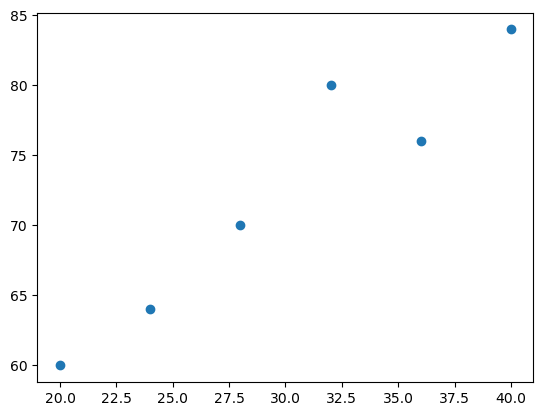

In [90]:
import matplotlib.pyplot as plt
plt.scatter(x=df['Age'],y=df["Weight"])
plt.show()

In [91]:
#4. Split into x and  y
x=df[["Age"]]
y=df[["Weight"]]

In [92]:
x

,Age
0,20
1,24
2,28
3,32
4,36
5,40


In [93]:
#5. Model Building
from sklearn.linear_model import LinearRegression
model = LinearRegression ()

#6. Model fitting
model.fit(x,y)

LinearRegression()

In [94]:
#7. Find intercept and coefficient
model.intercept_

array([36.76190476])

In [95]:
model.coef_

array([[1.18571429]])

In [96]:
print( "Slope =",model.coef_ ,"and intercept =" ,model.coef_)

Slope = [[1.18571429]] and intercept = [[1.18571429]]


In [97]:
# (Model.coef_ *30)+ Model.intercept_
(model.coef_*30)+ model.intercept_

array([[72.33333333]])

In [98]:
# Prediction for age = 30
a= np.array([[30]])
model.predict(a)

C:\Users\Kaustubh Jadhav\Downloads\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[72.33333333]])

In [99]:
df["Predicted Value"]= model.predict(x)
df

,Age,Weight,Predicted Value
0,20,60,60.476190
1,24,64,65.219048
2,28,70,69.961905
3,32,80,74.704762
4,36,76,79.447619
5,40,84,84.190476


In [100]:
df['Error']= abs(df["Weight"]-df["Predicted Value"]) # abs() used for obtaining absolute value of error
df['Error1']= (df["Weight"]-df["Predicted Value"])
df

,Age,Weight,Predicted Value,Error,Error1
0,20,60,60.476190,0.476190,-0.476190
1,24,64,65.219048,1.219048,-1.219048
2,28,70,69.961905,0.038095,0.038095
3,32,80,74.704762,5.295238,5.295238
4,36,76,79.447619,3.447619,-3.447619
5,40,84,84.190476,0.190476,-0.190476


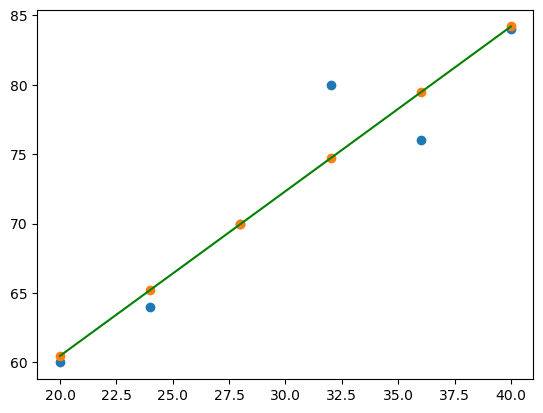

In [101]:
plt.scatter(x=df['Age'],y=df['Weight'])
plt.scatter(x=df['Age'],y=df['Predicted Value'])
plt.plot(df['Age'],df['Predicted Value'],color="green")
plt.show()

In [102]:
from sklearn.metrics import mean_squared_error , root_mean_squared_error, r2_score
mse = mean_squared_error(y,df['Predicted Value'])
rmse = root_mean_squared_error(y,df['Predicted Value'])
print("MSE =",mse)
print("RMSE =",rmse)

MSE = 6.946031746031729
RMSE = 2.635532535566907


In [103]:
r2_score= r2_score(y,df['Predicted Value'])
print("R2 Score =",r2_score)

R2 Score = 0.9042660249398383
